# IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/'

### combining the various csvs

In [3]:
import glob
import re

path = "/home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/narendra"
file_identifier = "*.csv"

narendra_df = pd.DataFrame()
for i,f in enumerate(glob.glob(path + "/*" + file_identifier)):
    df = pd.read_csv(f)
    narendra_df = narendra_df.append(df,ignore_index=True)
    print(i,f)
# narendra_df.index.values

0 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/narendra/narendamodi_14_april.csv
1 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/narendra/narendamodi_20_april.csv
2 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/narendra/narendamodi_21_april.csv
3 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/narendra/narendamodi_15_april.csv
4 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/narendra/narendamodi_12_april.csv
5 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/narendra/narendamodi_17_april.csv
6 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/narendra/narendamodi_20_1_april.csv
7 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/narendra/narendamodi_13_april.csv
8 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/narendra/narendamodi_16_april.csv
9 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/narendra/narendamodi_18_april.cs

In [4]:
# narendra_df = pd.read_csv(path+'narendraEmotion.csv',skiprows=[1,2])
print(narendra_df.shape)
narendra_df.head()


(4804, 24)


pos    neg    neu compound  Emotion         Author  \
0  0.213   0.12  0.667   0.4404      Joy    @apkalyanam   
1  0.169  0.031    0.8   0.7351      Joy       @sme1965   
2  0.175      0  0.825   0.7184      Joy   @sudhir94700   
3      0  0.323  0.677  -0.6486  Sadness     @AlkaJacob   
4  0.123   0.08  0.797   0.3094      Joy  @ajay29635797   

                                             Content                 Date  \
0  @narendramodi Sir, Greetings.We wish to know a...  2019-04-14 13:47:12   
1  @ChairmanIba @DFS_India @rajeevkumr Financial ...  2019-04-14 13:47:11   
2  After some time, it can be a matter of finding...  2019-04-14 13:47:01   
3  @IndiaToday @IndiaTodayFLASH @narendramodi How...  2019-04-14 13:46:58   
4  @TimesNow We have lost our future... where to ...  2019-04-14 13:46:52   

  Language Location  ...                                 Author Description  \
0       en      NaN  ...  Founder - Self Sufficient Green Villages Movem...   
1       en      NaN  ...  MSMEs- #Create jobs for people #Revenue for go...   
2       en      NaN  ...  मै वित्सहित डिग्री कॉलेज मे समाज शास्त्र का प्...   
3       en      NaN  ...                                                NaN   
4       en      NaN  ...                                                NaN   

  Author Statuses Count Author Favourites Count Author Friends Count  \
0                  2454                      30                   17   
1                 18171                   15888                 1093   
2                 76659                   39828                  303   
3                 16962                   13917                   23   
4                   521                       4                   76   

  Author Followers Count Author Listed Count Author Verified Longitude  \
0                     72                   0           False       NaN   
1                    431                   8           False       NaN   
2                   3313                   8           False       NaN   
3                     11                   0           False       NaN   
4                     13                   0           False       NaN   

  Latitude Selected  
0      NaN       No  
1      NaN       No  
2      NaN       No  
3      NaN       No  
4      NaN       No  

[5 rows x 24 columns]

### droping attributes and converting types

In [5]:
# def slice_columns(narendra_df):
narendra_df = narendra_df.drop(['Date', 'Location',
                               'Author Statuses Count', 'Author Favourites Count',
                               'Author Friends Count', 'Author Followers Count', 
                                'Author Listed Count', 'Author Description', 'Selected'],axis=1)

# narendra_df.columns

In [6]:
# narendra_df.pos,_ = pd.factorize(narendra_df.pos)
narendra_df['pos'] = pd.to_numeric(narendra_df['pos'],errors='coerce')
narendra_df['neg'] = pd.to_numeric(narendra_df['neg'],errors='coerce')
narendra_df['neu'] = pd.to_numeric(narendra_df['neu'],errors='coerce')
narendra_df['compound'] = pd.to_numeric(narendra_df['compound'],errors='coerce')
narendra_df['Emotion_fc'],_ = pd.factorize(narendra_df.Emotion)

In [7]:
narendra_df.corr()

pos       neg       neu  compound  Emotion_fc
pos         1.000000 -0.229128 -0.757194  0.659206    0.075247
neg        -0.229128  1.000000 -0.462316 -0.680484   -0.027114
neu        -0.757194 -0.462316  1.000000 -0.143857   -0.050322
compound    0.659206 -0.680484 -0.143857  1.000000    0.001081
Emotion_fc  0.075247 -0.027114 -0.050322  0.001081    1.000000

In [8]:
narendra_df.head()

pos    neg    neu  compound  Emotion         Author  \
0  0.213  0.120  0.667    0.4404      Joy    @apkalyanam   
1  0.169  0.031  0.800    0.7351      Joy       @sme1965   
2  0.175  0.000  0.825    0.7184      Joy   @sudhir94700   
3  0.000  0.323  0.677   -0.6486  Sadness     @AlkaJacob   
4  0.123  0.080  0.797    0.3094      Joy  @ajay29635797   

                                             Content Language Number of Likes  \
0  @narendramodi Sir, Greetings.We wish to know a...       en               0   
1  @ChairmanIba @DFS_India @rajeevkumr Financial ...       en               0   
2  After some time, it can be a matter of finding...       en               0   
3  @IndiaToday @IndiaTodayFLASH @narendramodi How...       en               0   
4  @TimesNow We have lost our future... where to ...       en               0   

  Number of Retweets    In Reply To                    Author Name  \
0                  0  @narendramodi            Arupathy P.Kalyanam   
1                  0   @ChairmanIba  MSMEs are backbone of economy   
2                  0            NaN                   Sudhir Kumar   
3                  0    @IndiaToday               alka maria jacob   
4                  0      @TimesNow                           ajay   

  Author Verified Longitude Latitude  Emotion_fc  
0           False       NaN      NaN           0  
1           False       NaN      NaN           0  
2           False       NaN      NaN           0  
3           False       NaN      NaN           1  
4           False       NaN      NaN           0

In [9]:
narendra_df = narendra_df[['Content','pos',
       'neg', 'neu', 'compound', 'Emotion','Emotion_fc'   
       ]]



In [10]:
narendra_df.corr()

pos       neg       neu  compound  Emotion_fc
pos         1.000000 -0.229128 -0.757194  0.659206    0.075247
neg        -0.229128  1.000000 -0.462316 -0.680484   -0.027114
neu        -0.757194 -0.462316  1.000000 -0.143857   -0.050322
compound    0.659206 -0.680484 -0.143857  1.000000    0.001081
Emotion_fc  0.075247 -0.027114 -0.050322  0.001081    1.000000

In [11]:
# # def sent_scores(narendra_df):    
# for i in narendra_df.index.values:

#     if narendra_df.loc[i,'compound']  >= 0.05 :
#         narendra_df.loc[i,'sentiment'] = 'Positive'
#     elif narendra_df.loc[i,'compound']  <= -0.05 :
#         narendra_df.loc[i,'sentiment'] = 'Negative'
#     else :
#         narendra_df.loc[i,'sentiment'] = 'Neutral'
# narendra_df.head()


In [12]:
import pickle
with open('/home/goodwillhunting/Anaconda Projects/Text Classification/tfidfmodel.pickle','rb') as f:
    vectorizer = pickle.load(f)
    
with open('/home/goodwillhunting/Anaconda Projects/Text Classification/classifier.pickle','rb') as f:
    clf = pickle.load(f)
    

In [13]:
list_tweets=[i for i in narendra_df.Content.values]
cleaned_content=[]
sentim=[]


In [14]:
for tweet in list_tweets:
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s', " ",str(tweet))
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*\s', " ",str(tweet))
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*$', " ",str(tweet))
    tweet = str(tweet).lower()
    tweet = re.sub(r"that's", "that is",str(tweet))
    
    
    tweet = re.sub(r'\W'," ",str(tweet))
    tweet = re.sub(r'\d', " ",str(tweet))
    tweet = re.sub(r'\s+[a-z]\s+'," ",str(tweet))
    tweet = re.sub(r'\s+[a-z]$'," ",str(tweet))
    tweet = re.sub(r'^[a-z]\s+'," ",str(tweet))
    tweet = re.sub(r'\s+'," ",str(tweet))
    
    cleaned_content.append(tweet)
    sent = clf.predict(vectorizer.transform([tweet]).toarray())
    sentim.append(sent)
    
narendra_df['sentiment'] = np.array(sentim).ravel()
narendra_df.head()


Content    pos    neg    neu  \
0  @narendramodi Sir, Greetings.We wish to know a...  0.213  0.120  0.667   
1  @ChairmanIba @DFS_India @rajeevkumr Financial ...  0.169  0.031  0.800   
2  After some time, it can be a matter of finding...  0.175  0.000  0.825   
3  @IndiaToday @IndiaTodayFLASH @narendramodi How...  0.000  0.323  0.677   
4  @TimesNow We have lost our future... where to ...  0.123  0.080  0.797   

   compound  Emotion  Emotion_fc  sentiment  
0    0.4404      Joy           0          1  
1    0.7351      Joy           0          1  
2    0.7184      Joy           0          1  
3   -0.6486  Sadness           1          0  
4    0.3094      Joy           0          0

# look at different combinations and probabilities

In [15]:
a = narendra_df.groupby(['sentiment','Emotion']).size()
(a)

sentiment  Emotion     
0          Anger              6
           Anticipation       5
           Disgust           15
           Fear             109
           Joy              814
           Sadness           73
           Surprise         234
           Trust             25
1          Anger             22
           Anticipation       1
           Disgust           25
           Fear             335
           Joy             2065
           Sadness          192
           Surprise         780
           Trust             99
           discrete           2
dtype: int64

In [16]:
# narendra_df.sentiment.value_counts()
narendra_df.Emotion.value_counts()

Joy             2879
Surprise        1014
Fear             444
Sadness          265
Trust            124
Disgust           40
Anger             28
Anticipation       6
discrete           2
Name: Emotion, dtype: int64

In [17]:
d = a.to_frame(name='count')

# d['count'][12:]
neg = d.values[:8].ravel()

pos = d.values[8:-1].ravel()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
explode = (0.1, 0, 0, 0, 0, 0,0) 
pos

array([  22,    1,   25,  335, 2065,  192,  780,   99])

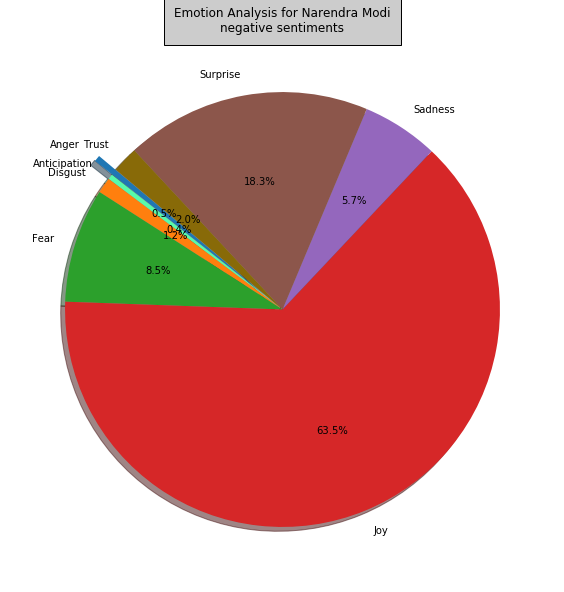

In [18]:
plt.figure(figsize=(10,10))
plt.pie(neg,labels=['Anger','Anticipation','Disgust','Fear','Joy','Sadness','Surprise','Trust'],autopct='%1.1f%%',
      explode = (0.1, 0, 0, 0, 0, 0,0,0),
        colors = ["#1f77b4",'#58FAAC' ,"#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",'#886A08'],shadow=True, startangle=140
       )
plt.title("Emotion Analysis for Narendra Modi\n" + "negative sentiments", bbox={'facecolor':'0.8', 'pad':10})
plt.show()

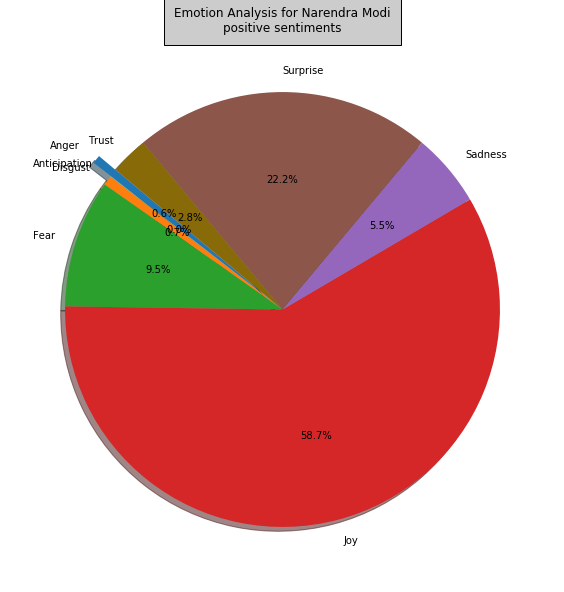

In [19]:
plt.figure(figsize=(10,10))
plt.pie(pos,labels=['Anger','Anticipation','Disgust','Fear','Joy','Sadness','Surprise','Trust'],autopct='%1.1f%%',
      explode = (0.1, 0, 0, 0, 0, 0,0,0),
        colors = ["#1f77b4",'#58FAAC' ,"#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",'#886A08'],shadow=True, startangle=140
       )
plt.title("Emotion Analysis for Narendra Modi\n" + "positive sentiments", bbox={'facecolor':'0.8', 'pad':10})
plt.show()


# Data analysis

### preprocessing (cleaning tweets)

In [34]:
narendra_df.tail(10)

Content    pos    neg    neu  \
4794  @Afzaal___Khan @nailainayat @narendramodi It w...  0.053  0.156  0.791   
4795  Painful service at Ahmedabad regional passport...  0.140  0.121  0.738   
4796                  @narendramodi True, will not let.  0.412  0.000  0.588   
4797  So the @BJP4India chooses a #Woman who stands ...  0.085  0.000  0.915   
4798  @mepratap @BJP4India @BJP4Karnataka @AmitShah ...  0.203  0.000  0.797   
4799  @zubbudxb @narendramodi So, you want to know.o...  0.114  0.034  0.852   
4800  @RenukaJain6 @ChaudhrGurnam @RahulGandhi @nare...  0.219  0.000  0.781   
4801  @ArnabGoswamiRtv @narendramodi @AmitShah @myog...  0.474  0.000  0.526   
4802  Scenes from PM Shri @narendramodi  ji rally in...  0.346  0.000  0.654   
4803  @DimeUPROXX   my father....religious follower ...  0.000  0.000  1.000   

      compound   Emotion  Emotion_fc  sentiment  \
4794   -0.7845       Joy           0          1   
4795    0.2023       Joy           0          1   
4796    0.4215   Sadness           1          1   
4797    0.3612       Joy           0          1   
4798    0.7840       Joy           0          1   
4799    0.5233       Joy           0          0   
4800    0.4215  Surprise           2          1   
4801    0.6597  Surprise           2          1   
4802    0.8398  Surprise           2          1   
4803    0.0000       Joy           0          1   

                                        cleaned_content  
4794   afzaal___khan nailainayat narendramodi it was...  
4795  painful service at ahmedabad regional passport...  
4796                    narendramodi true will not let   
4797  so the bjp india chooses woman who stands for ...  
4798   mepratap bjp india bjp karnataka amitshah nar...  
4799   zubbudxb narendramodi so you want to know ok ...  
4800   renukajain chaudhrgurnam rahulgandhi narendra...  
4801   arnabgoswamirtv narendramodi amitshah myogiad...  
4802  scenes from pm shri narendramodi ji rally in b...  
4803   dimeuproxx my father religious follower of pm...

In [21]:
list_tweets=[i for i in narendra_df.Content.values]
cleaned_content=[]


In [22]:
for tweet in list_tweets:
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s', " ",str(tweet))
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*\s', " ",str(tweet))
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*$', " ",str(tweet))
    tweet = str(tweet).lower()
    tweet = re.sub(r"that's", "that is",str(tweet))
    
    
    tweet = re.sub(r'\W'," ",str(tweet))
    tweet = re.sub(r'\d', " ",str(tweet))
    tweet = re.sub(r'\s+[a-z]\s+'," ",str(tweet))
    tweet = re.sub(r'\s+[a-z]$'," ",str(tweet))
    tweet = re.sub(r'^[a-z]\s+'," ",str(tweet))
    tweet = re.sub(r'\s+'," ",str(tweet))
    
    cleaned_content.append(tweet)
    
narendra_df['cleaned_content'] = cleaned_content

In [23]:
narendra_df.to_csv("NarendraCombine.csv")

### Bag of words model

In [24]:
from nltk.corpus import stopwords
from sklearn.datasets import load_files
import nltk
nltk.download('stopwords')

#Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=len(sentim), min_df=3, max_df=0.6,stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(cleaned_content).toarray()


#Term Frequency - Inverse Document Frequency (TF-IDF)
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X = transformer.fit_transform(X).toarray()


#Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=len(X), min_df=3, max_df=0.6,stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(cleaned_content).toarray()

y = np.array(sentim).ravel()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/goodwillhunting/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
#Training and test set
from sklearn.model_selection import train_test_split
text_train,text_test,sent_train,sent_test= train_test_split(X,y,test_size=0.2,random_state = 42)

### Build a classifier

In [26]:
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression()
lg_clf.fit(text_train,sent_train)

/home/goodwillhunting/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB(alpha=1.0, fit_prior=True)
nb_clf.fit(text_train,sent_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rand_clf=RandomForestClassifier(random_state=42,n_jobs=-1)
rand_clf.fit(text_train,sent_train)


/home/goodwillhunting/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [29]:
from sklearn.metrics import accuracy_score
for clf in (lg_clf, nb_clf, rand_clf):
#     sent_test_pred = clf.predict(text_test)
    print(clf.__class__.__name__, clf.score(text_train,sent_train))
print('---------'*8)
for clf in (lg_clf, nb_clf, rand_clf):
    sent_test_pred = clf.predict(text_test)

    print(clf.__class__.__name__, accuracy_score(sent_test,sent_test_pred))

LogisticRegression 0.8597449908925319
MultinomialNB 0.8121259432734843
RandomForestClassifier 0.9919333853760083
------------------------------------------------------------------------
LogisticRegression 0.7887617065556711
MultinomialNB 0.7398543184183143
RandomForestClassifier 0.7918834547346514


## Ensembling Voting Classifier

In [30]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
estimators=[('lr', lg_clf), ('rf', nb_clf), ('svc', rand_clf)],
voting='soft'
)
voting_clf.fit(text_train,sent_train)

/home/goodwillhunting/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Multinom...timators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [31]:
voting_clf.score(text_test,sent_test)

0.785639958376691

In [32]:
sent_test_pred = clf.predict(text_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(sent_test,sent_test_pred,target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.88      0.26      0.40       265
    Positive       0.78      0.99      0.87       696

   micro avg       0.79      0.79      0.79       961
   macro avg       0.83      0.62      0.63       961
weighted avg       0.81      0.79      0.74       961



In [37]:
for clf in (lg_clf, nb_clf, rand_clf,voting_clf):
    sent_test_pred = clf.predict(text_test)

    print(clf.__class__.__name__)
    print(classification_report(sent_test,sent_test_pred))
    print('------------------'*6)

LogisticRegression
              precision    recall  f1-score   support

           0       0.92      0.26      0.40       265
           1       0.78      0.99      0.87       696

   micro avg       0.79      0.79      0.79       961
   macro avg       0.85      0.62      0.64       961
weighted avg       0.82      0.79      0.74       961

------------------------------------------------------------------------------------------------------------
MultinomialNB
              precision    recall  f1-score   support

           0       0.74      0.09      0.16       265
           1       0.74      0.99      0.85       696

   micro avg       0.74      0.74      0.74       961
   macro avg       0.74      0.54      0.50       961
weighted avg       0.74      0.74      0.66       961

------------------------------------------------------------------------------------------------------------
RandomForestClassifier
              precision    recall  f1-score   support

           0     

In [39]:
for clf in (lg_clf, nb_clf, rand_clf,voting_clf):
    sent_test_pred = clf.predict(text_test)

    print(clf.__class__.__name__)
    print(confusion_matrix(sent_test,sent_test_pred))
    print('------------------'*6)

LogisticRegression
[[ 68 197]
 [  6 690]]
------------------------------------------------------------------------------------------------------------
MultinomialNB
[[ 23 242]
 [  8 688]]
------------------------------------------------------------------------------------------------------------
RandomForestClassifier
[[124 141]
 [ 59 637]]
------------------------------------------------------------------------------------------------------------
VotingClassifier
[[ 68 197]
 [  9 687]]
------------------------------------------------------------------------------------------------------------
